<center style="font-size:35px;color:red;font-weight:bold"> Initiation à Python</center><br>
<center style="color:black;font-size:20px"> TP - Python : Graphes  </center>
<br>
<center style="color:black">**Cours du Pr. Abdellah AZMANI**</center>
<center style="color:black">**Département Génie Informatique**</center>
<br>
<center style="color:black">Université Abdelmalek Essaadi</center>
<center style="color:black">Faculté des Sciences et Techniques</center>
<center style="color:black">Tanger</center>

Un groupe d’amis organise une randonnée.

Soit Graphe G1(X1,Y1, un graphe non orienté, representé par les sommets A, B, C, D, E, F par lesquels ils peuvent choisir de passer.

Une arête entre deux sommets coïncide avec l’existence d’un chemin entre les deux sommets.

Ensemble des sommets: X = { A ,B ,C ,D ,E ,F}
Ensemble des arêtes: Y = {A:(B,D,E,F) , B:(A,C,E,F) , C:(B,F) , D:(A,E,F) , E:(A,B,D,F) , F:(A,B,C,D,E)}

### 1. Dessiner le graphe.
### 2. Justifier que le graphe est connexe.

** Rappel ** : Un graphe G est connexe si chaque couple de sommets est relié par une chaîne. 

### 3. Calculer le Degré des sommets du graphe

** Rappel ** : Pour un graphe ou un multigraphe, on appelle degré du sommet v, et on note d(v), le nombre d‘arêtes incidentes avec ce sommet

### 4. Donner la matrice d’adjacence M1 de ce graphe

Le groupe se trouve au sommet C et souhaite se rendre au sommet D. Les distances en kilomètres entre chaque sommet sont comme suit : 

* A = {(A,B)=2 , (A,D)=12 , (A,E)=3 , (A,F)=4}
* B = {(B,A)=2 , (B,C)=12 , (B,E)=5 , (B,F)=3}
* C = {(C,B)=12 , (C,F)=15}
* D = {(D,A)=12 , (D,E)=7 , (D,F)=23}
* E = {(E,A)=3 , (E,B)=5 , (E,D)=7 , (E,F)=8}
* F = {(F,A)=4 , (F,B)=3 , (F,C)=15 , (F,E)=8 , (F,D)=23}

### 5. suivant la nouvelle modélisation graphique, donner a matrice d’adjacence M2 du nouveau graphe
### 6. Déterminer le plus court chemin entre C et D en appliquant l’algorithme de Djikstra
### 7. Déterminer le plus courts chemins reliant le sommet F à tous les sommets du graphe en appliquant  l’algorithme de Ford-Bellman

Commençons par transformer le graphe non orienté en graphe orienté avec comme poids la durée du parcours, afin de calculer le temps à parcourir entre chaque sommet, la distance va être representé par minutes comme suit : 

* A = {(A,D)=30min , (A,E)=10min}
* B = {(B,A)=5min , (B,C)=30min , (B,F)=10min}
* C = {(C,B)=30min}
* D = {(D,E)=17min}
* E = {E,B)=15min , (E,F)=13min}
* F = {(F,A)=8min ,(F,C)=35min , (F,D)=55min}

### 8. suivant la nouvelle modélisation graphique, donner a matrice d’adjacence M2 du nouveau graphe
### 9. Extraire les circuits du graphe

** Rappel ** : Dans un graphe orienté, on appelle circuit une suite d'arcs consécutifs dont les deux sommets extrémités sont identiques 


### 10.  On vous demande d'appliquer les algorithmes précédents pour en extraire les chemins les plus rapides sachant que certains arcs présentent des contrainte qui peuvent apporter un ralentissement de quelques minutes (exemple l'arc ( F , D ) 15 mn)

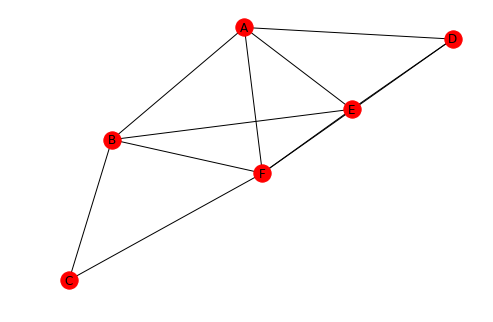

In [4]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with 4 connections
df = pd.DataFrame({ 'from':['A', 'A', 'A','A','B', 'B', 'B','B','C','C','D','D','D','E','E','E','E','F','F','F','F','F'], 'to':['B', 'D', 'E','F','A','C','E','F','B','F','A','E','F','A','B','D','F','A','B','C','D','E']})
df
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# Plot it
nx.draw(G, with_labels=True)
plt.show()

#Y = {A:(B,D,E,F) , B:(A,C,E,F) , C:(B,F) , D:(A,E,F) , E:(A,B,D,F) , F:(A,B,C,D,E)}
### 2. le Graphe est connexe 
Ce graphe est connexe car tous les sommets peuvent être reliés entre eux par (au moins) une chaine.
Par exemple, la chaîne **BCAFED** contient tous les sommets.

### 3. Calculer le Degré des sommets du graphe
* d(A) = 4
* d(B) = 4
* d(C) = 2
* d(D) = 3
* d(E) = 4
* d(F) = 5

### 4. Donner la matrice d’adjacence M1 de ce graphe

In [8]:
M1 = [[0,1,0,1,1,1],[1, 0, 1, 0, 1, 1],[0, 1, 0, 0, 0, 1],[1, 0, 0, 0, 1, 1],[1, 0, 0, 1, 1, 1],[1, 1, 1, 1, 1, 0]]
print(np.array(M1))

[[0 1 0 1 1 1]
 [1 0 1 0 1 1]
 [0 1 0 0 0 1]
 [1 0 0 0 1 1]
 [1 0 0 1 1 1]
 [1 1 1 1 1 0]]


### 5. suivant la nouvelle modélisation graphique, donner a matrice d’adjacence M2 du nouveau graphe

In [9]:
M2 = [[0,2,0,12,3,4],[2,0,12,0,5,3],[0,12,0,0,0,15],[12,0,0,0,7,23],[3,5,0,7,0,8],[4,3,15,23,8,0]]
print(np.array(M2))

[[ 0  2  0 12  3  4]
 [ 2  0 12  0  5  3]
 [ 0 12  0  0  0 15]
 [12  0  0  0  7 23]
 [ 3  5  0  7  0  8]
 [ 4  3 15 23  8  0]]


### 6. Déterminer le plus court chemin entre C et D en appliquant l’algorithme de Djikstra

#### Algorithme de Djikstra

In [10]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra
M2 = [[0,2,0,12,3,4],[2,0,12,0,5,3],[0,12,0,0,0,15],[12,0,0,0,7,23],[3,5,0,7,0,8],[4,3,15,23,8,0]]
G_eparse = csr_matrix(M2)
dist_matrix, predecessors = dijkstra (csgraph = G_eparse, directed = True,
return_predecessors = True)
print(dist_matrix)
print("--------------------------")
print(predecessors)

[[ 0.  2. 14. 10.  3.  4.]
 [ 2.  0. 12. 12.  5.  3.]
 [14. 12.  0. 24. 17. 15.]
 [10. 12. 24.  0.  7. 14.]
 [ 3.  5. 17.  7.  0.  7.]
 [ 4.  3. 15. 14.  7.  0.]]
--------------------------
[[-9999     0     1     4     0     0]
 [    1 -9999     1     4     1     1]
 [    1     2 -9999     4     1     2]
 [    4     4     1 -9999     3     0]
 [    4     4     1     4 -9999     0]
 [    5     5     5     4     0 -9999]]


In [22]:
class Dijkstra:

    def __init__(self, vertices, graph):
        self.vertices = vertices  # ("A", "B", "C" ...)
        self.graph = graph  # {"A": {"B": 1}, "B": {"A": 3, "C": 5} ...}

    def find_route(self, start, end):
        unvisited = {n: float("inf") for n in self.vertices}
        unvisited[start] = 0  # set start vertex to 0
        visited = {}  # list of all visited nodes
        parents = {}  # predecessors
        while unvisited:
            min_vertex = min(unvisited, key=unvisited.get)  # get smallest distance
            for neighbour, _ in self.graph.get(min_vertex, {}).items():
                if neighbour in visited:
                    continue
                new_distance = unvisited[min_vertex] + self.graph[min_vertex].get(neighbour, float("inf"))
                if new_distance < unvisited[neighbour]:
                    unvisited[neighbour] = new_distance
                    parents[neighbour] = min_vertex
            visited[min_vertex] = unvisited[min_vertex]
            unvisited.pop(min_vertex)
            if min_vertex == end:
                break
        return parents, visited

    @staticmethod
    def generate_path(parents, start, end):
        path = [end]
        while True:
            key = parents[path[0]]
            path.insert(0, key)
            if key == start:
                break
        return path

In [29]:
input_vertices = ("A", "B", "C", "D", "E", "F")
input_graph = {
    "A": {"B": 2, "D": 12, "E": 3, "F": 4},
    "B": {"A": 2, "C": 12, "E": 5, "F":3},
    "C": {"B": 12, "F": 15},
    "D": {"A": 12, "E": 7, "F": 23},
    "E": {"A": 3, "B": 5, "D": 7, "F": 8},
    "F": {"A": 4, "B": 3, "C": 15, "D":23, "E":8},
}
start_vertex = "C"
end_vertex= "D"
dijkstra = Dijkstra(input_vertices, input_graph)
p, v = dijkstra.find_route(start_vertex, end_vertex)
print("Distance from %s to %s is: %.2f" % (start_vertex, end_vertex, v[end_vertex]))
se = dijkstra.generate_path(p, start_vertex, end_vertex)
print("Path from %s to %s is: %s" % (start_vertex, end_vertex, " -> ".join(se)))

Distance from C to D is: 24.00
Path from C to D is: C -> B -> E -> D


#### Algorithme de parcours en largeur (BFS : Breadth First Search)

In [8]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import breadth_first_tree 
G = [[0,2,0,12,3,4],[2,0,12,0,5,3],[0,12,0,0,0,15],[12,0,0,0,7,23],[3,5,0,7,0,8],[4,3,15,23,8,0]]
G_eparse = csr_matrix(G)
p = breadth_first_tree ( G_eparse, 0, directed = True)
p.toarray().astype(int)

array([[ 0,  2,  0, 12,  3,  4],
       [ 0,  0, 12,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0]])

#### Algorithme de parcours en profondeur (DFS : Depth First Search)

In [11]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import depth_first_tree 
G = [[0,2,0,12,3,4],[2,0,12,0,5,3],[0,12,0,0,0,15],[12,0,0,0,7,23],[3,5,0,7,0,8],[4,3,15,23,8,0]]
G_eparse = csr_matrix(G)
d = depth_first_tree ( G_eparse, 0, directed = True)
d.toarray().astype(int)

array([[ 0,  2,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 15],
       [ 0,  0,  0,  0,  7,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 23,  0,  0]])

### 7. Déterminer le plus courts chemins reliant le sommet F à tous les sommets du graphe en appliquant l’algorithme de Ford-Bellman

In [13]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import bellman_ford
G = [[0,2,0,12,3,4],[2,0,12,0,5,3],[0,12,0,0,0,15],[12,0,0,0,7,23],[3,5,0,7,0,8],[4,3,15,23,8,0]]
G_eparse = csr_matrix(G)
dist_matrix, predecessors = bellman_ford (csgraph = G_eparse, directed = True,
return_predecessors = True)
print(dist_matrix)
print("--------------------------")
print(predecessors)

[[ 0.  2. 14. 10.  3.  4.]
 [ 2.  0. 12. 12.  5.  3.]
 [14. 12.  0. 24. 17. 15.]
 [10. 12. 24.  0.  7. 14.]
 [ 3.  5. 17.  7.  0.  7.]
 [ 4.  3. 15. 14.  7.  0.]]
--------------------------
[[-9999     0     1     4     0     0]
 [    1 -9999     1     4     1     1]
 [    1     2 -9999     4     1     2]
 [    4     4     1 -9999     3     0]
 [    4     4     1     4 -9999     0]
 [    5     5     5     4     0 -9999]]


### 8.suivant la nouvelle modélisation graphique, donner a matrice d’adjacence M2 du nouveau graphe

In [6]:
import numpy as np

M2 = [[0,0,0,30,0,10],[5,0,30,0,0,10],[0,30,0,0,0,0],[0,0,0,0,17,0],[0,15,0,0,0,13],[8,0,35,55,0,0]]

print(np.array(M2))

[[ 0  0  0 30  0 10]
 [ 5  0 30  0  0 10]
 [ 0 30  0  0  0  0]
 [ 0  0  0  0 17  0]
 [ 0 15  0  0  0 13]
 [ 8  0 35 55  0  0]]


### 9.Extraire les circuits du graphe

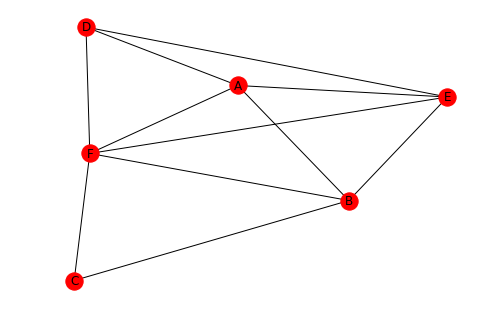

In [2]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with 4 connections
df = pd.DataFrame({ 'from':['A', 'A', 'B','B','B', 'C', 'D','E','E','F','F','F'], 'to':['D', 'E', 'A','C','F','B','E','B','F','A','C','D']})
df
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# Plot it
nx.draw(G, with_labels=True)
plt.show()

### 10.  On vous demande d'appliquer les algorithmes précédents pour en extraire les chemins les plus rapides sachant que certains arcs présentent des contrainte qui peuvent apporter un ralentissement de quelques minutes (exemple l'arc ( D , F ) 15 mn)

In [3]:
import numpy as np

M2 = [[0,0,0,30,0,10],[5,0,30,0,0,10],[0,30,0,0,0,0],[0,0,0,0,17,-15],[0,15,0,0,0,13],[8,0,35,55,0,0]]

print(np.array(M2))

[[  0   0   0  30   0  10]
 [  5   0  30   0   0  10]
 [  0  30   0   0   0   0]
 [  0   0   0   0  17 -15]
 [  0  15   0   0   0  13]
 [  8   0  35  55   0   0]]


#### Algorithme de parcours en largeur (BFS : Breadth First Search)

In [10]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import breadth_first_tree 

G= [[0,0,0,30,0,10],[5,0,30,0,0,10],[0,30,0,0,0,0],[0,0,0,0,17,-15],[0,15,0,0,0,13],[8,0,35,55,0,0]]

G_eparse = csr_matrix(G)
p = breadth_first_tree ( G_eparse, 0, directed = True)
p.toarray().astype(int)

array([[ 0,  0,  0, 30,  0, 10],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 17,  0],
       [ 0, 15,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0]])

#### Algorithme de parcours en profondeur (DFS : Depth First Search)

In [12]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import depth_first_tree 
G= [[0,0,0,30,0,10],[5,0,30,0,0,10],[0,30,0,0,0,0],[0,0,0,0,17,-15],[0,15,0,0,0,13],[8,0,35,55,0,0]]
G_eparse = csr_matrix(G)
d = depth_first_tree ( G_eparse, 0, directed = True)
d.toarray().astype(int)

array([[ 0,  0,  0, 30,  0,  0],
       [ 0,  0, 30,  0,  0, 10],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 17,  0],
       [ 0, 15,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0]])

#### Algorithme de Dijkstra

In [4]:
class Dijkstra:

    def __init__(self, vertices, graph):
        self.vertices = vertices  # ("A", "B", "C" ...)
        self.graph = graph  # {"A": {"B": 1}, "B": {"A": 3, "C": 5} ...}

    def find_route(self, start, end):
        unvisited = {n: float("inf") for n in self.vertices}
        unvisited[start] = 0  # set start vertex to 0
        visited = {}  # list of all visited nodes
        parents = {}  # predecessors
        while unvisited:
            min_vertex = min(unvisited, key=unvisited.get)  # get smallest distance
            for neighbour, _ in self.graph.get(min_vertex, {}).items():
                if neighbour in visited:
                    continue
                new_distance = unvisited[min_vertex] + self.graph[min_vertex].get(neighbour, float("inf"))
                if new_distance < unvisited[neighbour]:
                    unvisited[neighbour] = new_distance
                    parents[neighbour] = min_vertex
            visited[min_vertex] = unvisited[min_vertex]
            unvisited.pop(min_vertex)
            if min_vertex == end:
                break
        return parents, visited

    @staticmethod
    def generate_path(parents, start, end):
        path = [end]
        while True:
            key = parents[path[0]]
            path.insert(0, key)
            if key == start:
                break
        return path

In [5]:
input_vertices = ("A", "B", "C", "D", "E", "F")
input_graph = {
    "A": {"D": 30, "E": 10},
    "B": {"A": 5, "C": 30,"F":10},
    "C": {"B": 30},
    "D": {"E": 17,"F":-15},
    "E": {"B": 15,"F": 13},
    "F": {"A": 8, "C": 35, "D":55},
}
start_vertex = "C"
end_vertex= "D"
dijkstra = Dijkstra(input_vertices, input_graph)
p, v = dijkstra.find_route(start_vertex, end_vertex)
print("Distance from %s to %s is: %.2f" % (start_vertex, end_vertex, v[end_vertex]))
se = dijkstra.generate_path(p, start_vertex, end_vertex)
print("Path from %s to %s is: %s" % (start_vertex, end_vertex, " -> ".join(se)))

Distance from C to D is: 65.00
Path from C to D is: C -> B -> A -> D


#### Algorithme de Dijkstra

In [1]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import bellman_ford
G= [[0,0,0,30,0,10],[5,0,30,0,0,10],[0,30,0,0,0,0],[0,0,0,0,17,-15],[0,15,0,0,0,13],[8,0,35,55,0,0]]
G_eparse = csr_matrix(G)
dist_matrix, predecessors = bellman_ford (csgraph = G_eparse, directed = True,
return_predecessors = True)
print(dist_matrix)
print("--------------------------")
print(predecessors)

[[  0.  62.  45.  30.  47.  10.]
 [  5.   0.  30.  35.  52.  10.]
 [ 35.  30.   0.  65.  82.  40.]
 [ -7.  32.  20.   0.  17. -15.]
 [ 20.  15.  45.  50.   0.  13.]
 [  8.  65.  35.  38.  55.   0.]]
--------------------------
[[-9999     4     5     0     3     0]
 [    1 -9999     1     0     3     1]
 [    1     2 -9999     0     3     1]
 [    5     4     5 -9999     3     3]
 [    1     4     1     0 -9999     4]
 [    5     2     5     0     3 -9999]]
